In [49]:
from funcs.notebook import *

In [50]:
df = pd.read_csv("../results/adtests.csv")

In [51]:
# select the latest results
df = df[df.tstamp>="2021-12-14"]
df.tail()

,tstamp,period,sector,subsample,AD,p,nflares,nsteps_mcmc,totobs_days,shift
923,2021-12-14,Rotation,Sector 1,total,1.226262,0.4846,75,10000,25.130556,0.5
924,2021-12-14,Rotation,Sector 1,total,2.135947,0.1474,75,10000,25.130556,0.6
925,2021-12-14,Rotation,Sector 1,total,1.031424,0.6378,75,10000,25.130556,0.7
926,2021-12-14,Rotation,Sector 1,total,1.854788,0.2318,75,10000,25.130556,0.8
927,2021-12-14,Rotation,Sector 1,total,0.930958,0.7826,75,10000,25.130556,0.9


In [59]:
df = df[df.nsteps_mcmc == 10000].iloc[-270:]
(df.groupby(["sector",'subsample','period']).count() == 10).all()

tstamp         True
AD             True
p              True
nflares        True
nsteps_mcmc    True
totobs_days    True
shift          True
dtype: bool

In [60]:
assert df.shape[0] == 270

In [74]:
groupedmed = df.groupby(["period", "sector", "subsample"]).p.median()
groupedvar = df.groupby(["period", "sector", "subsample"]).p.std()

In [75]:
d = pd.DataFrame({"pval":groupedmed, "sig":groupedvar})
d

pval       sig
period      sector       subsample                         
Beat Period Both Sectors high energy half  0.4487  0.253562
                         low energy half   0.7987  0.363887
                         total             0.4367  0.240324
            Sector 1     high energy half  0.3607  0.255029
                         low energy half   0.4473  0.325918
                         total             0.7408  0.292144
            Sector 27    high energy half  0.3881  0.322197
                         low energy half   0.6543  0.245448
                         total             0.6166  0.200831
Orbit       Both Sectors high energy half  0.0606  0.063678
                         low energy half   0.5327  0.193231
                         total             0.2161  0.138988
            Sector 1     high energy half  0.2997  0.203155
                         low energy half   0.4611  0.341509
                         total             0.1818  0.195684
            Sector 27    high energy half  0.4075  0.302093
                         low energy half   0.5607  0.265424
                         total             0.5847  0.283916
Rotation    Both Sectors high energy half  0.8340  0.279338
                         low energy half   0.6780  0.315786
                         total             0.4628  0.257165
            Sector 1     high energy half  0.6389  0.332435
                         low energy half   0.6447  0.272808
                         total             0.6700  0.260011
            Sector 27    high energy half  0.1164  0.115172
                         low energy half   0.6902  0.298398
                         total             0.2594  0.266948

In [69]:
dd = d.apply(lambda x: fr"${x.pval:.2f}$", axis=1)#\pm {x.sig:.2f}

In [70]:
ddd = dd.unstack(level=0).T

In [71]:
groupedn = df.groupby(["period", "sector", "subsample"]).nflares.first().unstack(level=0).T.iloc[0]
groupedn = groupedn.rename("# flares")

In [72]:
dddd = ddd.append(groupedn)
names = [r'$n$', "$p(P_{orb})$", "$p(P_{rot})$", "$p(P_{syn})$"]
oldnames = [r'# flares', "Orbit", "Rotation", "Beat Period"]
dddd = dddd.T.rename(index=str, columns=dict(zip(oldnames, names))).T
dddd

sector           Both Sectors                                 Sector 1  \
subsample    high energy half low energy half   total high energy half   
period                                                                   
$p(P_{syn})$           $0.45$          $0.80$  $0.44$           $0.36$   
$p(P_{orb})$           $0.06$          $0.53$  $0.22$           $0.30$   
$p(P_{rot})$           $0.83$          $0.68$  $0.46$           $0.64$   
$n$                        71             118     189               38   

sector                                      Sector 27                          
subsample    low energy half   total high energy half low energy half   total  
period                                                                         
$p(P_{syn})$          $0.45$  $0.74$           $0.39$          $0.65$  $0.62$  
$p(P_{orb})$          $0.46$  $0.18$           $0.41$          $0.56$  $0.58$  
$p(P_{rot})$          $0.64$  $0.67$           $0.12$          $0.69$  $0.26$  
$n$                       37      75               33              81     114

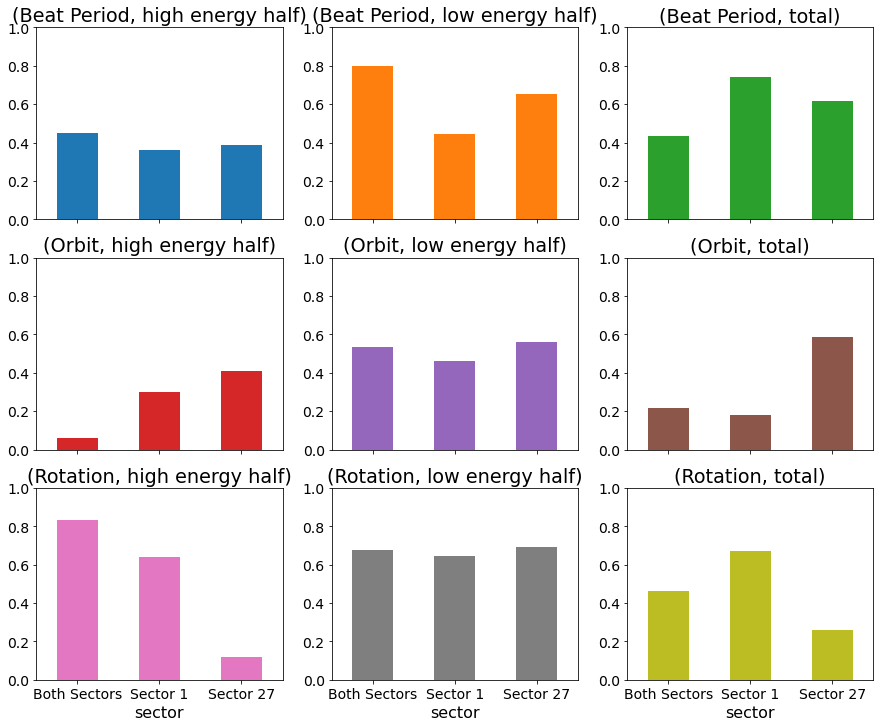

In [92]:
f = df.groupby(["period", "sector","subsample"]).p.median()
f.unstack(level=0).unstack(level=1).plot(kind='bar', subplots=True, rot=0, 
                                         figsize=(15, 12), layout=(3, 3), legend=False,
                                         ylim=(0,1));

In [93]:
stri = dddd.T[names].to_latex(index=True, escape=False, column_format=f"llcccc")
stri = stri.replace("\\toprule","\hline")
stri = stri.replace("\\midrule","\hline")
stri = stri.replace("{}","\hline")
stri = stri.replace("\\bottomrule","\hline\n" )
stri = stri.replace("%","\%" )
stri = stri.replace("high energy half","$ED>1\,$s")
stri = stri.replace("low energy half","$ED<1\,$s")
stri = stri.replace("Both Sectors","both")
stri = stri.replace("Sector 27","27")
stri = stri.replace("Sector 1","1")
stri = stri.replace("subsample &      &","sample &     $n$ &")
stri = stri.replace("period","")
stri = stri.replace("&  $n$ &    $","&      &    $") 
stri = stri.replace("$0.06$","$\mathbf{0.06}$") 

print(stri)

\begin{tabular}{llcccc}
\hline
          &  &  $n$ & $p(P_{orb})$ & $p(P_{rot})$ & $p(P_{syn})$ \\
sector & sample &     $n$ &              &              &              \\
\hline
both & $ED>1\,$s &   71 &       $\mathbf{0.06}$ &       $0.83$ &       $0.45$ \\
          & $ED<1\,$s &  118 &       $0.53$ &       $0.68$ &       $0.80$ \\
          & total &  189 &       $0.22$ &       $0.46$ &       $0.44$ \\
1 & $ED>1\,$s &   38 &       $0.30$ &       $0.64$ &       $0.36$ \\
          & $ED<1\,$s &   37 &       $0.46$ &       $0.64$ &       $0.45$ \\
          & total &   75 &       $0.18$ &       $0.67$ &       $0.74$ \\
27 & $ED>1\,$s &   33 &       $0.41$ &       $0.12$ &       $0.39$ \\
          & $ED<1\,$s &   81 &       $0.56$ &       $0.69$ &       $0.65$ \\
          & total &  114 &       $0.58$ &       $0.26$ &       $0.62$ \\
\hline

\end{tabular}



In [94]:
with open("/home/ekaterina/Documents/002_writing/aumic-flaring-spi-draft/tables/pvals.tex", "w") as f:
    f.write(stri)